# Выбор признаков

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Загрузим датасет про Ирисы:

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
features = pd.DataFrame(X, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
target = pd.DataFrame(iris.target, columns=['Class'])
target.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [5]:
target.value_counts()

Class
0        50
1        50
2        50
dtype: int64

In [6]:
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Понижение размерности

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Нормализуем данные:

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

Обучаем модель

In [9]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
y_pred = classifier.predict(X_test_st)

Оценим эффективность:

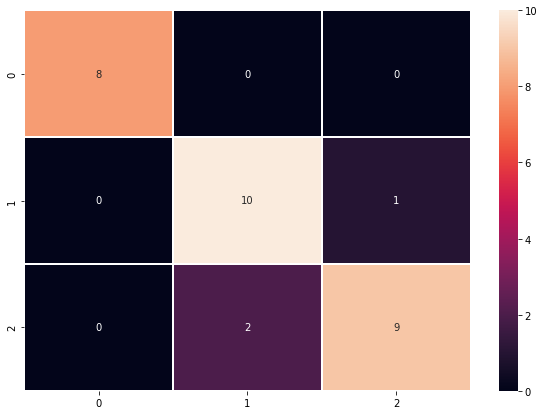

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

In [12]:
print(f"accuracy - {accuracy_score(y_test, y_pred)}")

accuracy - 0.9


Понизим размерность данных до 1-го атрибута

In [13]:
from sklearn.decomposition import PCA

pca_1 = PCA(n_components=1)
X_train_st_с1 = pca_1.fit_transform(X_train_st)
X_test_st_с1 = pca_1.transform(X_test_st)

Обучаем модель и предскажем значения

accuracy - 0.9333333333333333


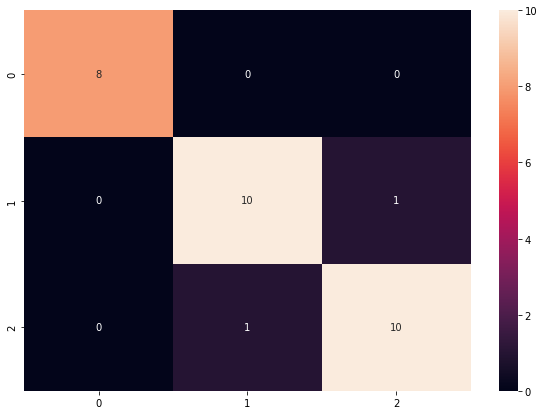

In [14]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st_с1, y_train)

y_pred_с1 = classifier.predict(X_test_st_с1)

cm = confusion_matrix(y_test, y_pred_с1)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred_с1)}")

In [15]:
pca_2 = PCA(n_components=2)
X_train_st_с2 = pca_2.fit_transform(X_train_st)
X_test_st_с2 = pca_2.transform(X_test_st)

accuracy - 0.8666666666666667


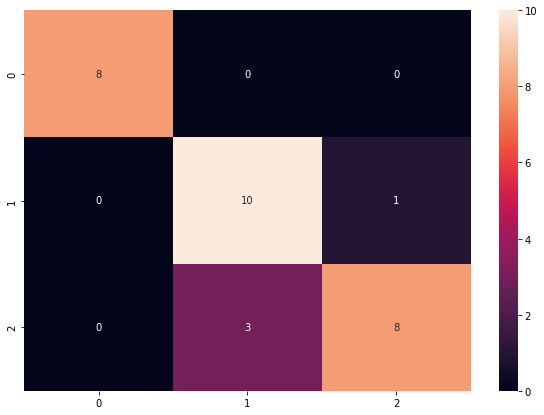

In [16]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st_с2, y_train)

y_pred_с2 = classifier.predict(X_test_st_с2)

cm = confusion_matrix(y_test, y_pred_с2)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred_с2)}")